<a href="https://colab.research.google.com/github/hsnam95/class2021Fall/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = np.pi/2  # phase, radian

In [ ]:
# generate samples
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

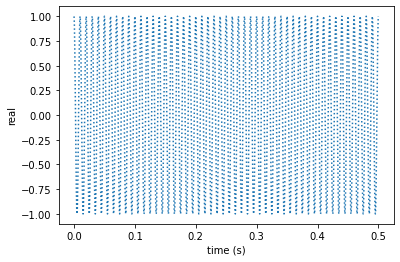

In [ ]:
# plot the entire signal
plt.plot(t, s, ':')
plt.xlabel('time (s)')
plt.ylabel('real')

Text(0, 0.5, 'real')

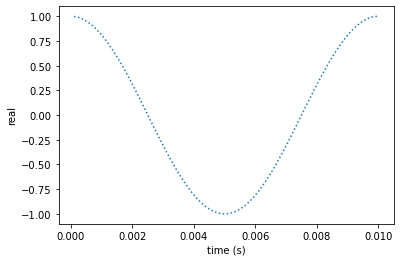

In [ ]:
# plot a certain of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=10000)

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Dividing signal by the window size and step

In [4]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

### Intensity by RMS

In [9]:
frames.shape[0]

38

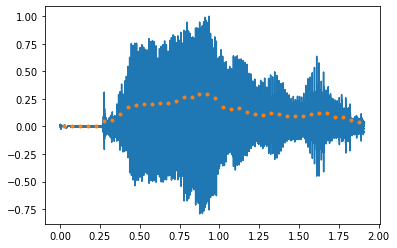

In [17]:
from scipy.io import wavfile
sr, s = wavfile.read('a.wav')

dur = len(s)/sr
t = np.arange(1, len(s)+1)/sr
s = s/np.max(s)

win_size = 0.05
win_step = 0.05

frames = frame_signal(s, sr, win_size, win_step)
framesT = np.arange(frames.shape[0]) * win_step + win_size/2

amp = []
for frame in frames:
  amp.append(np.sqrt(np.mean(frame**2)))

plt.plot(t, s)
plt.plot(framesT, amp, '.')
plt.show()

In [ ]:
frames = frame_signal(s, sr, 0.05, 0.05)
frames

(38, 2205)

### Pitch by autocorrelation

In [ ]:
from scipy.io import wavfile
sr, s = wavfile.read('a.wav')

dur = len(s)/sr
t = np.arange(1, len(s)+1)/sr
s = s/np.max(s)

sl = 0.05
ws = 0.05
smpIdx = np.arange(0, round(sr*(dur-ws)), round(sl*sr))

a = []
for i in smpIdx:
s[i:i+round(ws*sr)]
r = N.correlate(x, x, mode = 'full')



plt.plot(t, s)
plt.plot(smpIdx/sr+ws/2, a, '.')
plt.show()

### Play musical notes

In [ ]:
def getFrequency(note):
    A4=440
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    octave = int(note[2]) if len(note) == 3 else int(note[1])
        
    keyNumber = notes.index(note[0:-1]);
    
    if (keyNumber < 3) :
        keyNumber = keyNumber + 12 + ((octave - 1) * 12) + 1; 
    else:
        keyNumber = keyNumber + ((octave - 1) * 12) + 1; 

    return A4 * 2** ((keyNumber- 49) / 12)

In [ ]:
amp = 1; sr = 10000; phase = 0

A4  = getFrequency('A4')
C5  = getFrequency('C5')
F5  = getFrequency('F5')
D5  = getFrequency('D5')
E5  = getFrequency('E5')	 
Eb5 = getFrequency('D#5') 
F5  = getFrequency('F5') 
G5  = getFrequency('G5')
Bb5 = getFrequency('A#5')
D6 = getFrequency('D6')

In [ ]:
# The bridge on the river Kwai

notes = [F5, D5, 0, D5, Eb5, F5, D6, 0, D6, 0, Bb5, 0, \
         F5, D5, 0, D5, Eb5, D5, F5, 0, F5, 0, Eb5, 0, \
         Eb5, C5, 0, C5, D5, Eb5, F5, D5, 0, D5, E5, D5, \
         C5, F5, D5, E5, C5, G5, F5]

durs = [0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.25, \
        0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 1.5]

In [ ]:
s_all = np.empty(0)

for note, dur in zip(notes, durs):
  s, t, th= phasor_sine(amp, sr, dur, note, phase)
  s_all = np.concatenate((s_all, s))

In [ ]:
ipd.Audio(s_all, rate=sr)